In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
# Note that the input is not scaled here, which is consistent with the sklearn implementation.
X_centered = (X - np.mean(X, axis=0)) 

In [5]:
cov_matrix = np.cov(X_centered.T)

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [7]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:,sorted_indices]

In [8]:
top_eigenvectors = sorted_eigenvectors[:,:2]

In [9]:
X_pca = X_centered @ top_eigenvectors

In [10]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


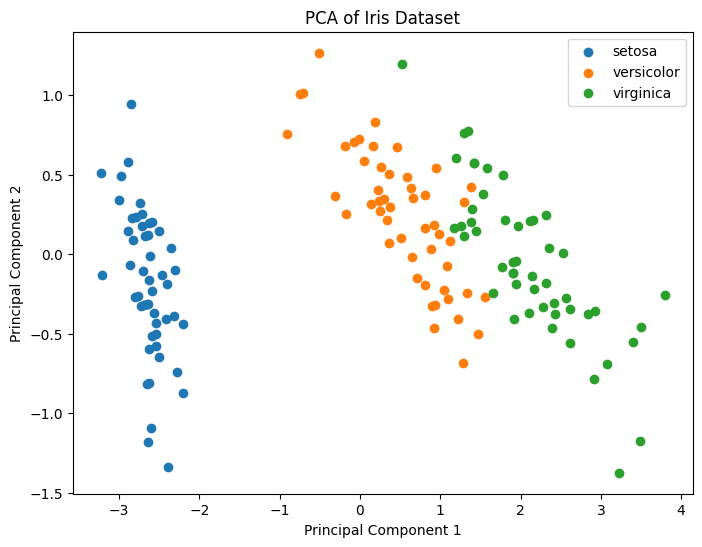

In [11]:
plt.figure(figsize=(8, 6))
for i, species in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()